In [2]:
import numpy as np
import pandas as pd

In [3]:
df_floor = pd.read_excel('use_data/침수관련_데이터.xlsx')
df_accident = pd.read_excel('use_data/교통사고_데이터.xlsx')

print(df_floor.shape, df_accident.shape)

(11500, 16) (11500, 5)


# 전처리

In [4]:
print(df_floor.info())
df_floor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   자치구(구)            11500 non-null  object 
 1   날짜                11500 non-null  int64  
 2   1hr 최대 강수량(mm)    11500 non-null  float64
 3   일평균 강수량(mm)       11500 non-null  float64
 4   경사도(˚)            11500 non-null  float64
 5   해발고도(m)           11500 non-null  float64
 6   불투수면(%)           11500 non-null  float64
 7   녹지 면적율(%)         11500 non-null  float64
 8   하천 면적율(%)         11500 non-null  float64
 9   복개하천 개수(개)        11500 non-null  int64  
 10  맨홀 개수(개)          11500 non-null  int64  
 11  빗물받이 개수(개)        11500 non-null  int64  
 12  빗물 펌프 개수(개)       11500 non-null  int64  
 13  [AVG] 하수관로 비율(%)  11500 non-null  object 
 14  [MAX] 하수관로 비율(%)  11500 non-null  object 
 15  침수 피해(0/1)        11500 non-null  int64  
dtypes: float64(7), int64(6), object(3)
memor

,자치구(구),날짜,1hr 최대 강수량(mm),일평균 강수량(mm),경사도(˚),해발고도(m),불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),빗물 펌프 개수(개),[AVG] 하수관로 비율(%),[MAX] 하수관로 비율(%),침수 피해(0/1)
0,종로,20180601,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.009084,0.033333,0
1,종로,20180602,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.008864,0.033333,0
2,종로,20180603,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.008182,0.033333,0
3,종로,20180604,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.008745,0.033333,0
4,종로,20180605,0.0,0.0,12.033665,146.699945,0.42017,0.009418,0.011652,1,9854,16173,0,0.008753,0.033333,0


In [5]:
cols = ['자치구', '날짜', '1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면',
       '녹지면적율', '하천면적율', '복개하천개수', '맨홀개수', '빗물받이개수',
       '빗물펌프개수', 'AVG_하수관로비율', 'MAX_하수관로비율', '침수피해']

df_floor.columns = cols

In [6]:
print(df_accident.info())
df_accident.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   자치구               11500 non-null  object
 1   날짜                11500 non-null  int64 
 2   [AVG] 하수관로 비율(%)  11500 non-null  object
 3   [MAX] 하수관로 비율(%)  11500 non-null  object
 4   사고[건]             11500 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 449.3+ KB
None


,자치구,날짜,[AVG] 하수관로 비율(%),[MAX] 하수관로 비율(%),사고[건]
0,종로,20180601,0.009084,0.033333,4
1,종로,20180602,0.008864,0.033333,4
2,종로,20180603,0.008182,0.033333,3
3,종로,20180604,0.008745,0.033333,2
4,종로,20180605,0.008753,0.033333,8


In [7]:
del df_floor['침수피해']

In [8]:
cols2 = ['자치구', '날짜', 'AVG_하수관로비율', 'MAX_하수관로비율', '사고건수']
df_accident.columns = cols2

In [9]:
df_floor['날짜'] = pd.to_datetime(df_floor['날짜'], format='%Y%m%d')
df_floor.loc[df_floor['AVG_하수관로비율'] == 'na', 'AVG_하수관로비율'] = np.NaN
df_floor.loc[df_floor['MAX_하수관로비율'] == 'na', 'MAX_하수관로비율'] = np.NaN

df_accident['날짜'] = pd.to_datetime(df_accident['날짜'], format='%Y%m%d')
df_accident.loc[df_accident['AVG_하수관로비율'] == 'na', 'AVG_하수관로비율'] = np.NaN
df_accident.loc[df_accident['MAX_하수관로비율'] == 'na', 'MAX_하수관로비율'] = np.NaN

In [10]:
df_floor['AVG_하수관로비율'] = df_floor['AVG_하수관로비율'].astype('float')
df_floor['MAX_하수관로비율'] = df_floor['MAX_하수관로비율'].astype('float')

df_accident['AVG_하수관로비율'] = df_accident['AVG_하수관로비율'].astype('float')
df_accident['MAX_하수관로비율'] = df_accident['MAX_하수관로비율'].astype('float')

In [11]:
df_floor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   자치구         11500 non-null  object        
 1   날짜          11500 non-null  datetime64[ns]
 2   1hr_최대강수량   11500 non-null  float64       
 3   일평균강수량      11500 non-null  float64       
 4   경사도         11500 non-null  float64       
 5   해발고도        11500 non-null  float64       
 6   불투수면        11500 non-null  float64       
 7   녹지면적율       11500 non-null  float64       
 8   하천면적율       11500 non-null  float64       
 9   복개하천개수      11500 non-null  int64         
 10  맨홀개수        11500 non-null  int64         
 11  빗물받이개수      11500 non-null  int64         
 12  빗물펌프개수      11500 non-null  int64         
 13  AVG_하수관로비율  11349 non-null  float64       
 14  MAX_하수관로비율  11349 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(4), object(1)
memory usage: 1.

In [12]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   자치구         11500 non-null  object        
 1   날짜          11500 non-null  datetime64[ns]
 2   AVG_하수관로비율  11349 non-null  float64       
 3   MAX_하수관로비율  11349 non-null  float64       
 4   사고건수        11500 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 449.3+ KB


In [13]:
# null값 제거
df_floor = df_floor.dropna(axis=0, how='any')
df_accident = df_accident.dropna(axis=0, how='any')

In [14]:
print(df_floor.isna().sum(), '\n\n', df_accident.isna().sum())

자치구           0
날짜            0
1hr_최대강수량     0
일평균강수량        0
경사도           0
해발고도          0
불투수면          0
녹지면적율         0
하천면적율         0
복개하천개수        0
맨홀개수          0
빗물받이개수        0
빗물펌프개수        0
AVG_하수관로비율    0
MAX_하수관로비율    0
dtype: int64 

 자치구           0
날짜            0
AVG_하수관로비율    0
MAX_하수관로비율    0
사고건수          0
dtype: int64


In [15]:
# df_floor['year'] = df_floor['날짜'].dt.year
df_floor['month'] = df_floor['날짜'].dt.month
df_floor['day'] = df_floor['날짜'].dt.day

# df_accident['year'] = df_accident['날짜'].dt.year
df_accident['month'] = df_accident['날짜'].dt.month
df_accident['day'] = df_accident['날짜'].dt.day

In [16]:
del df_floor['날짜']
del df_accident['날짜']

# 스케일링

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

col = ['1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율', '복개하천개수', 
          '맨홀개수', '빗물받이개수', '빗물펌프개수', 'AVG_하수관로비율', 'MAX_하수관로비율']

col2 = ['AVG_하수관로비율', 'MAX_하수관로비율', '사고건수']

stand_scale = StandardScaler()
minmax_scale = MinMaxScaler()
df_floor_standard = df_floor.copy()
df_floor_minmax = df_floor.copy()
df_accident_standard = df_accident.copy()
df_accident_minmax = df_accident.copy()

df_floor_standard[col] = stand_scale.fit_transform(df_floor_standard[col])
df_floor_minmax[col] = minmax_scale.fit_transform(df_floor_minmax[col])

df_accident_standard[col2] = stand_scale.fit_transform(df_accident_standard[col2])
df_accident_minmax[col2] = minmax_scale.fit_transform(df_accident_minmax[col2])

In [18]:
df_floor_minmax.head()

,자치구,1hr_최대강수량,일평균강수량,경사도,해발고도,불투수면,녹지면적율,하천면적율,복개하천개수,맨홀개수,빗물받이개수,빗물펌프개수,AVG_하수관로비율,MAX_하수관로비율,month,day
0,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.005219,0.000816,6,1
1,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.005093,0.000816,6,2
2,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.004701,0.000816,6,3
3,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.005025,0.000816,6,4
4,종로,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,0.0,0.005029,0.000816,6,5


In [19]:
# One-Hot encoding
df_floor_onehot = pd.get_dummies(df_floor_minmax)
df_floor_onehot.head()

,1hr_최대강수량,일평균강수량,경사도,해발고도,불투수면,녹지면적율,하천면적율,복개하천개수,맨홀개수,빗물받이개수,...,자치구_성동,자치구_성북,자치구_송파,자치구_양천,자치구_영등포,자치구_용산,자치구_은평,자치구_종로,자치구_중,자치구_중랑
0,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False
1,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False
2,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False
3,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False
4,0.0,0.0,0.883197,0.770065,0.15067,0.079188,0.026666,0.25,0.396268,0.219224,...,False,False,False,False,False,False,False,True,False,False


In [20]:
# One-Hot encoding
df_accident_onehot = pd.get_dummies(df_accident_minmax)
df_accident_onehot.head()

,AVG_하수관로비율,MAX_하수관로비율,사고건수,month,day,자치구_강남,자치구_강동,자치구_강북,자치구_강서,자치구_관악,...,자치구_성동,자치구_성북,자치구_송파,자치구_양천,자치구_영등포,자치구_용산,자치구_은평,자치구_종로,자치구_중,자치구_중랑
0,0.005219,0.000816,0.166667,6,1,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.005093,0.000816,0.166667,6,2,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.004701,0.000816,0.125000,6,3,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.005025,0.000816,0.083333,6,4,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0.005029,0.000816,0.333333,6,5,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [21]:
df_floor_label = df_floor_minmax.copy()
df_accident_label = df_accident_minmax.copy()
print(df_floor_minmax['자치구'].astype('category').cat.categories)
df_floor_label['자치구'] = df_floor_label['자치구'].astype('category').cat.codes
df_accident_label['자치구'] = df_accident_label['자치구'].astype('category').cat.codes

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '노원', '도봉', '동대문', '동작',
       '마포', '서대문', '서초', '성동', '성북', '송파', '양천', '영등포', '용산', '은평', '종로', '중',
       '중랑'],
      dtype='object')


# Modeling

In [22]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
# 평가지표 함수 생성
def adjusted_r_squared(r2_score,X_test):
    	return 1 - (1-r2_score)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)

def regressor_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2: {r2:.4f}')

In [24]:
df_floor_onehot.columns

Index(['1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율',
       '복개하천개수', '맨홀개수', '빗물받이개수', '빗물펌프개수', 'AVG_하수관로비율', 'MAX_하수관로비율',
       'month', 'day', '자치구_강남', '자치구_강동', '자치구_강북', '자치구_강서', '자치구_관악',
       '자치구_광진', '자치구_구로', '자치구_금천', '자치구_노원', '자치구_도봉', '자치구_동대문', '자치구_동작',
       '자치구_마포', '자치구_서대문', '자치구_서초', '자치구_성동', '자치구_성북', '자치구_송파', '자치구_양천',
       '자치구_영등포', '자치구_용산', '자치구_은평', '자치구_종로', '자치구_중', '자치구_중랑'],
      dtype='object')

In [25]:
df_floor_label.columns

Index(['자치구', '1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율',
       '복개하천개수', '맨홀개수', '빗물받이개수', '빗물펌프개수', 'AVG_하수관로비율', 'MAX_하수관로비율',
       'month', 'day'],
      dtype='object')

In [26]:
# x, y 분리 함수 생성
def split_xy(df, encoding, target):
    from sklearn.model_selection import train_test_split
    if encoding == 'onehot':
        if target == 'avg':
            df_x = df.iloc[:, [i for i in range(len(df.columns)) if i not in (11, 12)]]
            df_y = df.iloc[:, 11]
            return df_x, df_y
        elif target == 'max':
            df_x = df.iloc[:, [i for i in range(len(df.columns)) if i not in (11, 12)]]
            df_y = df.iloc[:, 12]
            return df_x, df_y
        else:
            print('target is avg or max')
    elif encoding == 'label':
        if target == 'avg':
            df_x = df.iloc[:, [i for i in range(len(df.columns)) if i not in (12, 13)]]
            df_y = df.iloc[:, 12]
            return df_x, df_y
        elif target == 'max':
            df_x = df.iloc[:, [i for i in range(len(df.columns)) if i not in (12, 13)]]
            df_y = df.iloc[:, 13]
            return df_x, df_y
        else:
            print('target is avg or max')
    else:
        print('encoding is onehot or label')

### OLS

In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df_floor_onehot_x, df_floor_onehot_y_avg = split_xy(df_floor_onehot, 'onehot', 'avg')
print(df_floor_onehot_x.shape, df_floor_onehot_y_avg.shape)

df_floor_onehot_x.iloc[:, 13:] = df_floor_onehot_x.iloc[:, 13:].astype('int')

train_x, test_x, train_y_avg, test_y_avg = train_test_split(df_floor_onehot_x, df_floor_onehot_y_avg, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_avg.shape, test_y_avg.shape)

x_train = sm.add_constant(train_x)
model = sm.OLS(train_y_avg, x_train).fit()
print(model.summary())

(11349, 38) (11349,)
(9079, 38) (2270, 38) (9079,) (2270,)
                            OLS Regression Results                            
Dep. Variable:             AVG_하수관로비율   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     104.9
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:32:04   Log-Likelihood:                 19061.
No. Observations:                9079   AIC:                        -3.805e+04
Df Residuals:                    9045   BIC:                        -3.781e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

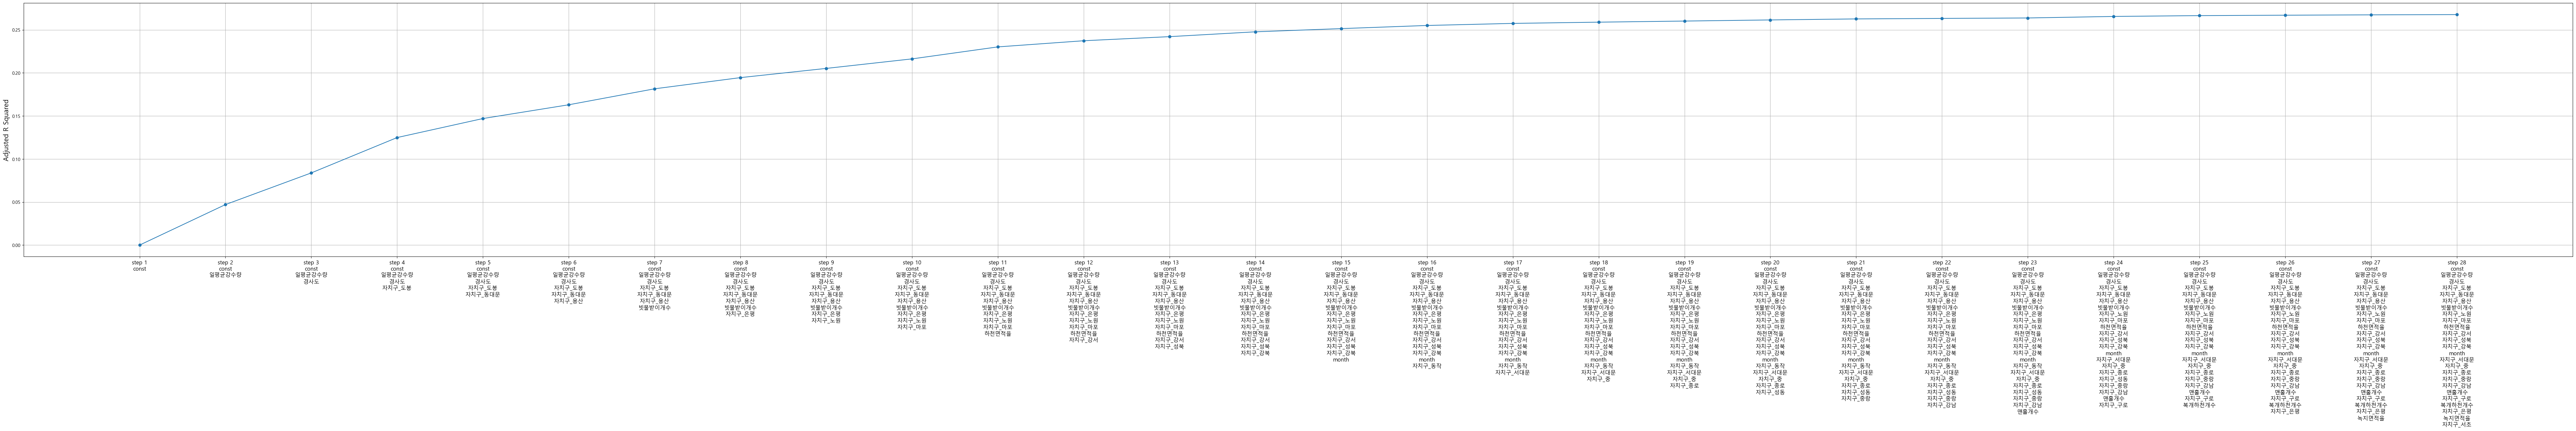

In [28]:
def step_wise_feature_selection(x_train, y_train, variables=x_train.columns.tolist()):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')
    
    y = y_train # 반응 변수
    
    selected_variables = [] # 선택된 변수
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] # 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] # 각 스텝별 수정된 결정계수
    steps = [] # 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) # 변수의 p-value
        # 기존 포함된 변수와 새로운 변수를 하나씩 돌아가며 선형 모형을 적합
        for col in remainder:
            x = x_train[selected_variables+[col]]
            x = sm.add_constant(x)
            model = sm.OLS(y, x).fit(disp=0)
            pval[col] = model.pvalues[col]
        
        min_pval = pval.min()
        if min_pval < sl_enter: # 최소 p-value갑사이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            # 선택된 변수들에 대해 어떤 변수를 제거할지 고르기
            while len(selected_variables) > 0:
                selected_X = x_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y, sm.add_constant(x_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    fig = plt.figure(figsize = (100, 10))
    fig.set_facecolor('white')
    
    font_size=15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables

selected_variables = step_wise_feature_selection(x_train, train_y_avg)

In [29]:
model = sm.OLS(train_y_avg, sm.add_constant(pd.DataFrame(x_train[selected_variables]))).fit(disp=0)
print(model.summary())
# 일평균강수량, 경사도, 빗물받이개수, 하천면적율, month, 맨홀개수, 복개하천개수, 녹지면적율

                            OLS Regression Results                            
Dep. Variable:             AVG_하수관로비율   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     139.3
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        16:32:14   Log-Likelihood:                 19017.
No. Observations:                9079   AIC:                        -3.798e+04
Df Residuals:                    9054   BIC:                        -3.781e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0129      0.004      3.645      0.0

In [30]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

df_floor_onehot_x.iloc[:, 13:] = df_floor_onehot_x.iloc[:, 13:].astype('int')

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

x_train = sm.add_constant(train_x)
model = sm.OLS(train_y_max, x_train).fit()
print(model.summary())

(11349, 38) (11349,)
(9079, 38) (2270, 38) (9079,) (2270,)
                            OLS Regression Results                            
Dep. Variable:             MAX_하수관로비율   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     19.59
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          1.37e-110
Time:                        16:32:15   Log-Likelihood:                 19936.
No. Observations:                9079   AIC:                        -3.980e+04
Df Residuals:                    9045   BIC:                        -3.956e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

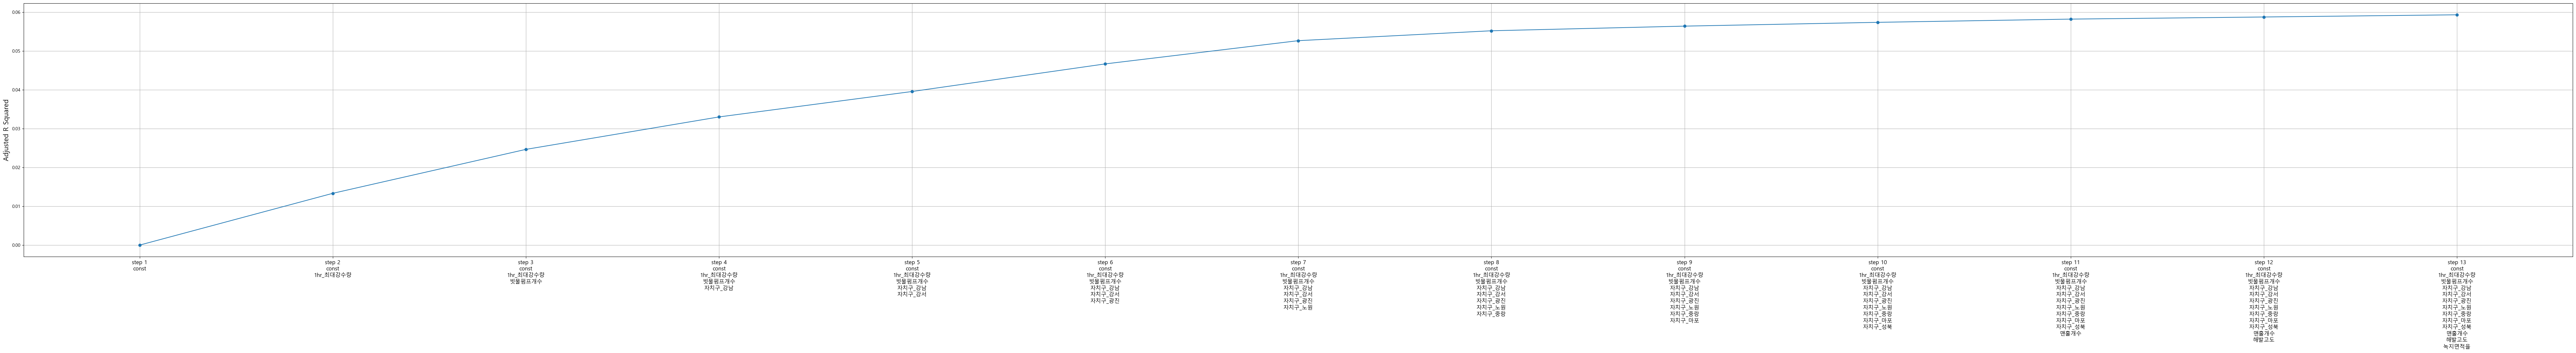

In [31]:
selected_variables = step_wise_feature_selection(x_train, train_y_max)

In [32]:
model = sm.OLS(train_y_max, sm.add_constant(pd.DataFrame(x_train[selected_variables]))).fit(disp=0)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             MAX_하수관로비율   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     48.67
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          1.62e-113
Time:                        16:32:19   Log-Likelihood:                 19906.
No. Observations:                9079   AIC:                        -3.979e+04
Df Residuals:                    9066   BIC:                        -3.969e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.001      8.612      0.0

In [33]:
len([i for i in range(len(df_floor_onehot_x.columns)) if i not in (0, 2, 3, 7, 12)])

33

In [34]:
# 일평균강수량, 경사도, 빗물받이개수, 하천면적율, month, 맨홀개수, 복개하천개수, 녹지면적율만 이용
df_floor_onehot_x, df_floor_onehot_y_avg = split_xy(df_floor_onehot, 'onehot', 'avg')
print(df_floor_onehot_x.shape, df_floor_onehot_y_avg.shape)

df_floor_onehot_x = df_floor_onehot_x.iloc[:, [i for i in range(len(df_floor_onehot_x.columns)) if i not in (0, 3, 4, 10, 12)]]

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_avg, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_avg.shape, test_y_avg.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_avg)
predict_y_avg = model.predict(test_x)
regressor_metrics(test_y_avg, predict_y_avg)

(11349, 38) (11349,)
(9079, 33) (2270, 33) (9079,) (2270,)
MAE: 0.0056
MSE: 0.0003
RMSE: 0.0164
R2: 0.7570


In [35]:
df_floor_onehot_x, df_floor_onehot_y_avg = split_xy(df_floor_onehot, 'onehot', 'avg')
print(df_floor_onehot_x.shape, df_floor_onehot_y_avg.shape)

train_x, test_x, train_y_avg, test_y_avg = train_test_split(df_floor_onehot_x, df_floor_onehot_y_avg, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_avg.shape, test_y_avg.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_avg)
predict_y_avg = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_avg)

(11349, 38) (11349,)
(9079, 38) (2270, 38) (9079,) (2270,)
MAE: 0.0038
MSE: 0.0001
RMSE: 0.0113
R2: 0.8852


In [36]:
df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_max)
predict_y_max = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_max)

(11349, 38) (11349,)
(9079, 38) (2270, 38) (9079,) (2270,)
MAE: 0.0047
MSE: 0.0005
RMSE: 0.0215
R2: 0.2223


In [37]:
df_floor_onehot_x.columns

Index(['1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율',
       '복개하천개수', '맨홀개수', '빗물받이개수', '빗물펌프개수', 'month', 'day', '자치구_강남',
       '자치구_강동', '자치구_강북', '자치구_강서', '자치구_관악', '자치구_광진', '자치구_구로', '자치구_금천',
       '자치구_노원', '자치구_도봉', '자치구_동대문', '자치구_동작', '자치구_마포', '자치구_서대문', '자치구_서초',
       '자치구_성동', '자치구_성북', '자치구_송파', '자치구_양천', '자치구_영등포', '자치구_용산', '자치구_은평',
       '자치구_종로', '자치구_중', '자치구_중랑'],
      dtype='object')

In [38]:
df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

df_floor_onehot_x = df_floor_onehot_x.iloc[:, [i for i in range(len(df_floor_onehot_x.columns)) if i not in (1, 2, 4, 6, 7, 9, 11, 12)]]


train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_max)
predict_y_max = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_max)

(11349, 38) (11349,)
(9079, 30) (2270, 30) (9079,) (2270,)
MAE: 0.0061
MSE: 0.0005
RMSE: 0.0221
R2: 0.1732


### 다중공선성 고려

In [39]:
df_floor.corr(numeric_only=True)

,1hr_최대강수량,일평균강수량,경사도,해발고도,불투수면,녹지면적율,하천면적율,복개하천개수,맨홀개수,빗물받이개수,빗물펌프개수,AVG_하수관로비율,MAX_하수관로비율,month,day
1hr_최대강수량,1.000000,0.865471,0.016730,0.019291,-0.017168,-0.002258,-0.008104,0.011389,0.009863,0.007161,0.017784,0.193020,0.114921,0.152763,0.042255
일평균강수량,0.865471,1.000000,0.010806,0.011378,-0.012150,0.005323,-0.005253,0.005061,0.005241,0.007817,0.025562,0.216048,0.100047,0.123126,0.037182
경사도,0.016730,0.010806,1.000000,0.909723,-0.575746,-0.547421,-0.620797,0.535017,-0.185179,-0.174540,-0.276364,-0.195002,-0.036855,-0.002064,-0.002628
해발고도,0.019291,0.011378,0.909723,1.000000,-0.602465,-0.533705,-0.584290,0.664558,-0.055860,-0.117585,-0.292675,-0.145673,-0.073737,-0.002405,-0.002457
불투수면,-0.017168,-0.012150,-0.575746,-0.602465,1.000000,0.259992,0.147120,-0.223510,-0.213659,-0.139813,0.172844,0.074618,0.008086,0.001059,0.002912
녹지면적율,-0.002258,0.005323,-0.547421,-0.533705,0.259992,1.000000,0.417076,-0.340561,0.310711,0.302770,0.330243,0.093399,0.042581,0.003152,0.001796
하천면적율,-0.008104,-0.005253,-0.620797,-0.584290,0.147120,0.417076,1.000000,-0.307577,0.168049,0.118593,0.300147,0.184388,0.045385,0.005125,0.002824
복개하천개수,0.011389,0.005061,0.535017,0.664558,-0.223510,-0.340561,-0.307577,1.000000,0.122270,0.023719,-0.148373,-0.029971,-0.053175,-0.000098,0.001388
맨홀개수,0.009863,0.005241,-0.185179,-0.055860,-0.213659,0.310711,0.168049,0.122270,1.000000,0.637746,0.157248,0.097609,0.065325,0.003015,0.001052
빗물받이개수,0.007161,0.007817,-0.174540,-0.117585,-0.139813,0.302770,0.118593,0.023719,0.637746,1.000000,0.237478,0.096609,0.053844,0.003350,0.001592


In [40]:
# 경사도 - 해발고도 중 한 개 제거 필요
# 1hr_최대강수량 - 일평균강수량 중 하나 제거
# 맨홀개수 - 빗물받이개수 중 하나 제거

df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

# max 하수관로 비율과 더 관련 있는 것을 남기고 삭제
del df_floor_onehot_x['경사도']
del df_floor_onehot_x['빗물받이개수']
del df_floor_onehot_x['일평균강수량']

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_max)
predict_y_max = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_max)

(11349, 38) (11349,)
(9079, 35) (2270, 35) (9079,) (2270,)
MAE: 0.0045
MSE: 0.0004
RMSE: 0.0198
R2: 0.3360


In [41]:
df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_max)
predict_y_max = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_max)

(11349, 38) (11349,)
(9079, 38) (2270, 38) (9079,) (2270,)
MAE: 0.0047
MSE: 0.0005
RMSE: 0.0215
R2: 0.2223


In [42]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

# max 하수관로 비율과 더 관련 있는 것을 남기고 삭제(다중공선성)
del df_floor_onehot_x['경사도']
del df_floor_onehot_x['빗물받이개수']
del df_floor_onehot_x['일평균강수량']

df_floor_onehot_x.iloc[:, 10:] = df_floor_onehot_x.iloc[:, 10:].astype('int')

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

x_train = sm.add_constant(train_x)
model = sm.OLS(train_y_max, x_train).fit()
print(model.summary())

(11349, 38) (11349,)
(9079, 35) (2270, 35) (9079,) (2270,)
                            OLS Regression Results                            
Dep. Variable:             MAX_하수관로비율   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     19.58
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          3.15e-104
Time:                        16:32:50   Log-Likelihood:                 19917.
No. Observations:                9079   AIC:                        -3.977e+04
Df Residuals:                    9047   BIC:                        -3.954e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [43]:
# 위 결과에서 p-value 0.05가 넘는 항목 제거
df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

# max 하수관로 비율과 더 관련 있는 것을 남기고 삭제(다중공선성)
del df_floor_onehot_x['경사도']
del df_floor_onehot_x['빗물받이개수']
del df_floor_onehot_x['일평균강수량']
del df_floor_onehot_x['맨홀개수']
del df_floor_onehot_x['녹지면적율']
del df_floor_onehot_x['month']
del df_floor_onehot_x['day']

df_floor_onehot_x.iloc[:, 6:] = df_floor_onehot_x.iloc[:, 6:].astype('int')

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

x_train = sm.add_constant(train_x)
model = sm.OLS(train_y_max, x_train).fit()
print(model.summary())

(11349, 38) (11349,)
(9079, 31) (2270, 31) (9079,) (2270,)
                            OLS Regression Results                            
Dep. Variable:             MAX_하수관로비율   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     22.30
Date:                Mon, 14 Aug 2023   Prob (F-statistic):          7.27e-106
Time:                        16:32:50   Log-Likelihood:                 19915.
No. Observations:                9079   AIC:                        -3.977e+04
Df Residuals:                    9051   BIC:                        -3.957e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [44]:
# p-value가 유의수준을 넘어가는 것을 제거했을 때 결과에 큰 변화가 없어 다중공선성 방지를 위한 컬럼제거만 진행
df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

# max 하수관로 비율과 더 관련 있는 것을 남기고 삭제(다중공선성)
del df_floor_onehot_x['경사도']
del df_floor_onehot_x['빗물받이개수']
del df_floor_onehot_x['일평균강수량']

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_max)
predict_y_max = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_max)

(11349, 38) (11349,)
(9079, 35) (2270, 35) (9079,) (2270,)
MAE: 0.0045
MSE: 0.0004
RMSE: 0.0198
R2: 0.3360


In [45]:
df_floor_onehot_x, df_floor_onehot_y_max = split_xy(df_floor_onehot, 'onehot', 'max')
print(df_floor_onehot_x.shape, df_floor_onehot_y_max.shape)

train_x, test_x, train_y_max, test_y_max = train_test_split(df_floor_onehot_x, df_floor_onehot_y_max, test_size=0.2, random_state=0, shuffle=True)
print(train_x.shape, test_x.shape, train_y_max.shape, test_y_max.shape)

model = RandomForestRegressor(random_state=0)
model.fit(train_x, train_y_max)
predict_y_max = model.predict(test_x)
regressor_metrics(test_y_max, predict_y_max)

(11349, 38) (11349,)
(9079, 38) (2270, 38) (9079,) (2270,)
MAE: 0.0047
MSE: 0.0005
RMSE: 0.0215
R2: 0.2223
